In [ ]:
pip install tensorflow


Epoch 1/20
782/782 [==============================] - 48s 48ms/step - loss: 1.7260 - accuracy: 0.3539 - val_loss: 1.2906 - val_accuracy: 0.5290
Epoch 2/20
782/782 [==============================] - 35s 45ms/step - loss: 1.1418 - accuracy: 0.5921 - val_loss: 1.0857 - val_accuracy: 0.6174
Epoch 3/20
782/782 [==============================] - 35s 45ms/step - loss: 0.9078 - accuracy: 0.6762 - val_loss: 0.8914 - val_accuracy: 0.6852
Epoch 4/20
782/782 [==============================] - 35s 45ms/step - loss: 0.7696 - accuracy: 0.7270 - val_loss: 0.8657 - val_accuracy: 0.6988
Epoch 5/20
782/782 [==============================] - 34s 44ms/step - loss: 0.6584 - accuracy: 0.7690 - val_loss: 0.7655 - val_accuracy: 0.7395
Epoch 6/20
782/782 [==============================] - 35s 44ms/step - loss: 0.5678 - accuracy: 0.7978 - val_loss: 0.7668 - val_accuracy: 0.7407
Epoch 7/20
782/782 [==============================] - 34s 44ms/step - loss: 0.4838 - accuracy: 0.8266 - val_loss: 0.7569 - val_accuracy:

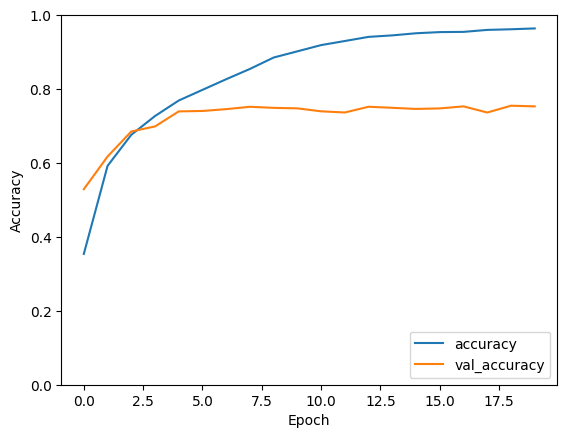

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Loading CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Define Inception Module
# A 1x1 convolutional layer (conv1x1) that helps in local pattern recognition.
# Another pathway begins with a 1x1 convolution (conv1x1_3x3), followed by a deeper 3x3 convolution (conv3x3).
# This combination helps reduce dimensionality initially and then does a deeper analysis, allowing the network to capture more complicated patterns.
# Similarly, a third pathway enables the network to capture greater spatial patterns by beginning with a 1x1 convolution (conv1x1_5x5)
# and ending with a 5x5 convolution (conv5x5). To further capture the most important characteristics throughout the input,
# a max-pooling operation is used together with a subsequent 1x1 convolution (maxpool3x3 and maxpool1x1).
def inception_module(x, filters):
    conv1x1 = layers.Conv2D(filters[0], (1,1), padding='same', activation='relu')(x)

    conv1x1_3x3 = layers.Conv2D(filters[1], (1,1), padding='same', activation='relu')(x)
    conv3x3 = layers.Conv2D(filters[2], (3,3), padding='same', activation='relu')(conv1x1_3x3)

    conv1x1_5x5 = layers.Conv2D(filters[3], (1,1), padding='same', activation='relu')(x)
    conv5x5 = layers.Conv2D(filters[4], (5,5), padding='same', activation='relu')(conv1x1_5x5)

    maxpool3x3 = layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    maxpool1x1 = layers.Conv2D(filters[5], (1,1), padding='same', activation='relu')(maxpool3x3)

    output = layers.concatenate([conv1x1, conv3x3, conv5x5, maxpool1x1], axis=-1)
    return output

# Build VGG-16 with Inception module
def vgg16_with_inception():
    input_layer = layers.Input(shape=(32, 32, 3))

    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = inception_module(x, [128, 128, 192, 32, 96, 64])
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = inception_module(x, [192, 96, 208, 16, 48, 64])
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    output_layer = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Instantiate model
model = vgg16_with_inception()

# Compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training  model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Evaluating model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


**Analysis**

Training:

VGG16: Easier to train due to its simpler architecture. Hyperparameter tuning is not crucial.

VGG16 with Inception Module: Training might take longer due to the increased complexity of the model. Hyperparameter tuning is crucial.

Performance:

VGG16 is generally faster to train and requires less memory due to its simpler structure.

VGG16 with Inception Module achieves higher accuracy on image classification tasks, especially for smaller datasets like CIFAR-10, due to the ability of inception modules to extract more diverse features.

Overfitting:

VGG16 with inception modules might be more prone to overfitting on smaller datasets due to the increased number of parameters. Regularization techniques like dropout or L1/L2 regularization become more important